In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os
import csv
import numpy as np
import yfinance as yf
import requests
from yahoo_fin.stock_info import get_data
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import linear_model


In [3]:
#reading in file
market_cap = "market_cap.csv"

market_cap_df = pd.read_csv(market_cap)
market_cap_df.drop('Rank', axis=1, inplace=True)
market_cap_df

,Name,Symbol,marketcap,price (USD),country
0,Apple,AAPL,2649592692736,164.87,United States
1,Microsoft,MSFT,2090595778560,280.32,United States
2,Alphabet (Google),GOOG,1535855427584,118.14,United States
3,Amazon,AMZN,1420253331456,139.41,United States
4,Tesla,TSLA,910032830464,871.27,United States
...,...,...,...,...,...
787,Cemtrex,CETX,8666889,0.33,United States
788,Grom Social Enterprises,GROM,7506036,0.40,United States
789,Pareteum Corporation,TEUM,228316,0.00,United States
790,Yandex,YNDX.ME,0,33.05,Netherlands


In [4]:
market_cap_df.dtypes

Name            object
Symbol          object
marketcap        int64
price (USD)    float64
country         object
dtype: object

In [5]:
#reading in file
employees = "employees.csv"

employees_df = pd.read_csv(employees)
employees_df.drop('Rank', axis=1, inplace=True)
employees_df

,Name,Symbol,employees_count,price (USD),country
0,Amazon,AMZN,1608000,139.41,United States
1,IBM,IBM,345900,132.61,United States
2,Jingdong Mall,JD,314906,58.84,China
3,Alibaba,BABA,259316,90.84,China
4,Panasonic,6752.T,244479,8.30,Japan
...,...,...,...,...,...
787,Tucows,TCX,0,46.88,Canada
788,Pagaya Technologies,PGY,0,20.94,Israel
789,Nippon Ichi Software,3851.T,0,11.29,Japan
790,ACM Research,ACMR,0,18.88,United States


In [6]:
earnings = "earnings.csv"

earnings_df = pd.read_csv(earnings)
earnings_df.drop('Rank', axis=1, inplace=True)
earnings_df

,Name,Symbol,earnings_ttm,price (USD),country
0,Apple,AAPL,120470000000,164.87,United States
1,Alphabet (Google),GOOG,85774000000,118.14,United States
2,Microsoft,MSFT,83716000000,280.32,United States
3,Samsung,005930.KS,49690100000,46.78,South Korea
4,Meta Platforms (Facebook),META,39890000000,170.25,United States
...,...,...,...,...,...
787,Schibsted,SCHA.OL,-4370650000,19.15,Norway
788,DiDi,DIDIY,-7616800000,2.89,China
789,Teladoc Health,TDOC,-9870620000,38.79,United States
790,Uber,UBER,-10460000000,31.85,United States


In [7]:
operating_margin = "operating_margin.csv"

operating_margin_df = pd.read_csv(operating_margin)
operating_margin_df.drop('Rank', axis=1, inplace=True)
operating_margin_df

,Name,Symbol,operating_margin_ttm,price (USD),country
0,Triterras,TRIRF,9315.53,1.00,Singapore
1,Remark Holdings,MARK,7298.20,0.47,United States
2,EaseMyTrip,EASEMYTRIP.NS,6944.46,5.21,India
3,PlayWay,6P5.F,6748.95,71.07,Poland
4,Alpha &amp; Omega Semiconductor,AOSL,6541.09,38.94,United States
...,...,...,...,...,...
787,Nano Labs,NaN,NaN,6.34,China
788,AMTD Digital,HKD,NaN,405.00,Hong Kong
789,SoundHound AI,SOUN,NaN,3.51,United States
790,Cipher Mining,CIFR,NaN,2.12,United States


In [8]:
pe_ratio = "pe_ratio.csv"

pe_ratio_df = pd.read_csv(pe_ratio)
pe_ratio_df.drop('Rank', axis=1, inplace=True)
pe_ratio_df

,Name,Symbol,pe_ratio_ttm,price (USD),country
0,Sohu.com,SOHU,0.775281,17.27,China
1,Schibsted,SCHA.OL,0.906057,19.15,Norway
2,Remark Holdings,MARK,1.119050,0.47,United States
3,Troops,TROO,1.265310,2.58,Hong Kong
4,Triterras,TRIRF,1.351350,1.00,Singapore
...,...,...,...,...,...
787,Pagaya Technologies,PGY,0.000000,20.94,Israel
788,2U,TWOU,-2.484850,9.02,United States
789,Trust Stamp,IDAI,0.000000,1.45,United States
790,Scienjoy,SJ,0.000000,4.47,China


In [9]:
revenue = "revenue.csv"

revenue_df = pd.read_csv(revenue)
revenue_df.drop('Rank', axis=1, inplace=True)
revenue_df

,Name,Symbol,revenue_ttm,price (USD),country
0,Amazon,AMZN,485902000000,139.41,United States
1,Apple,AAPL,387542000000,164.87,United States
2,Alphabet (Google),GOOG,278139000000,118.14,United States
3,Samsung,005930.KS,247228637775,46.78,South Korea
4,Foxconn (Hon Hai Precision Industry),2317.TW,216696349259,3.60,Taiwan
...,...,...,...,...,...
787,AMTD Digital,HKD,0,405.00,Hong Kong
788,SoundHound AI,SOUN,0,3.51,United States
789,Cipher Mining,CIFR,0,2.12,United States
790,Pagaya Technologies,PGY,0,20.94,Israel


In [10]:
empcap = pd.merge(market_cap_df,employees_df,how='inner', on=['Symbol','Name','price (USD)','country'])
empcap

,Name,Symbol,marketcap,price (USD),country,employees_count
0,Apple,AAPL,2649592692736,164.87,United States,154000
1,Microsoft,MSFT,2090595778560,280.32,United States,181000
2,Alphabet (Google),GOOG,1535855427584,118.14,United States,156500
3,Amazon,AMZN,1420253331456,139.41,United States,1608000
4,Tesla,TSLA,910032830464,871.27,United States,99290
...,...,...,...,...,...,...
787,Cemtrex,CETX,8666889,0.33,United States,284
788,Grom Social Enterprises,GROM,7506036,0.40,United States,89
789,Pareteum Corporation,TEUM,228316,0.00,United States,199
790,Yandex,YNDX.ME,0,33.05,Netherlands,0


In [11]:
empcapearn = pd.merge(empcap,earnings_df,how='inner', on=['Symbol','Name','price (USD)','country'])
empcapearn

,Name,Symbol,marketcap,price (USD),country,employees_count,earnings_ttm
0,Apple,AAPL,2649592692736,164.87,United States,154000,120470000000
1,Microsoft,MSFT,2090595778560,280.32,United States,181000,83716000000
2,Alphabet (Google),GOOG,1535855427584,118.14,United States,156500,85774000000
3,Amazon,AMZN,1420253331456,139.41,United States,1608000,13362000000
4,Tesla,TSLA,910032830464,871.27,United States,99290,10919000000
...,...,...,...,...,...,...,...
787,Cemtrex,CETX,8666889,0.33,United States,284,-5214750
788,Grom Social Enterprises,GROM,7506036,0.40,United States,89,-11342800
789,Pareteum Corporation,TEUM,228316,0.00,United States,199,-41792000
790,Yandex,YNDX.ME,0,33.05,Netherlands,0,105689000


In [12]:
empcapearnmargin = pd.merge(empcapearn,operating_margin_df,how='inner', on=['Symbol','Name','price (USD)','country'])
empcapearnmargin

,Name,Symbol,marketcap,price (USD),country,employees_count,earnings_ttm,operating_margin_ttm
0,Apple,AAPL,2649592692736,164.87,United States,154000,120470000000,3153.200
1,Microsoft,MSFT,2090595778560,280.32,United States,181000,83716000000,4401.500
2,Alphabet (Google),GOOG,1535855427584,118.14,United States,156500,85774000000,3282.530
3,Amazon,AMZN,1420253331456,139.41,United States,1608000,13362000000,512.823
4,Tesla,TSLA,910032830464,871.27,United States,99290,10919000000,1570.830
...,...,...,...,...,...,...,...,...
787,Cemtrex,CETX,8666889,0.33,United States,284,-5214750,-1076.650
788,Grom Social Enterprises,GROM,7506036,0.40,United States,89,-11342800,-15493.800
789,Pareteum Corporation,TEUM,228316,0.00,United States,199,-41792000,-5017.220
790,Yandex,YNDX.ME,0,33.05,Netherlands,0,105689000,-362.584


In [13]:
empcapearnmarginratio = pd.merge(empcapearnmargin,pe_ratio_df,how='inner', on=['Symbol','Name','price (USD)','country'])
empcapearnmarginratio

,Name,Symbol,marketcap,price (USD),country,employees_count,earnings_ttm,operating_margin_ttm,pe_ratio_ttm
0,Apple,AAPL,2649592692736,164.87,United States,154000,120470000000,3153.200,26.549100
1,Microsoft,MSFT,2090595778560,280.32,United States,181000,83716000000,4401.500,28.899000
2,Alphabet (Google),GOOG,1535855427584,118.14,United States,156500,85774000000,3282.530,21.699000
3,Amazon,AMZN,1420253331456,139.41,United States,1608000,13362000000,512.823,65.946100
4,Tesla,TSLA,910032830464,871.27,United States,99290,10919000000,1570.830,93.785800
...,...,...,...,...,...,...,...,...,...
787,Cemtrex,CETX,8666889,0.33,United States,284,-5214750,-1076.650,-1.650000
788,Grom Social Enterprises,GROM,7506036,0.40,United States,89,-11342800,-15493.800,-0.333333
789,Pareteum Corporation,TEUM,228316,0.00,United States,199,-41792000,-5017.220,-0.000000
790,Yandex,YNDX.ME,0,33.05,Netherlands,0,105689000,-362.584,-70.428400


In [14]:
complete_df = pd.merge(empcapearnmarginratio,revenue_df,how='inner', on=['Symbol','Name','price (USD)','country'])
complete_df

,Name,Symbol,marketcap,price (USD),country,employees_count,earnings_ttm,operating_margin_ttm,pe_ratio_ttm,revenue_ttm
0,Apple,AAPL,2649592692736,164.87,United States,154000,120470000000,3153.200,26.549100,387542000000
1,Microsoft,MSFT,2090595778560,280.32,United States,181000,83716000000,4401.500,28.899000,198270000000
2,Alphabet (Google),GOOG,1535855427584,118.14,United States,156500,85774000000,3282.530,21.699000,278139000000
3,Amazon,AMZN,1420253331456,139.41,United States,1608000,13362000000,512.823,65.946100,485902000000
4,Tesla,TSLA,910032830464,871.27,United States,99290,10919000000,1570.830,93.785800,67166000000
...,...,...,...,...,...,...,...,...,...,...
787,Cemtrex,CETX,8666889,0.33,United States,284,-5214750,-1076.650,-1.650000,48435177
788,Grom Social Enterprises,GROM,7506036,0.40,United States,89,-11342800,-15493.800,-0.333333,5653763
789,Pareteum Corporation,TEUM,228316,0.00,United States,199,-41792000,-5017.220,-0.000000,65048000
790,Yandex,YNDX.ME,0,33.05,Netherlands,0,105689000,-362.584,-70.428400,6248110406


In [15]:
complete_df.dtypes

Name                     object
Symbol                   object
marketcap                 int64
price (USD)             float64
country                  object
employees_count           int64
earnings_ttm              int64
operating_margin_ttm    float64
pe_ratio_ttm            float64
revenue_ttm               int64
dtype: object

In [16]:
# with pd.option_context('display.float_format', '${:,.2f}'.format):
#     display(complete_df)

In [17]:
#groupbys
country_count = complete_df.groupby(['country'])['country']\
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
#found at https://stackoverflow.com/questions/40454030/count-and-sort-with-pandas
country_count

,country,count
35,United States,464
7,China,47
20,Japan,40
18,Israel,28
34,United Kingdom,25
14,India,22
5,Canada,19
32,Taiwan,19
12,Germany,17
28,South Korea,15


In [18]:
#bins
complete_df['marketcap'].describe()


count    7.920000e+02
mean     2.543875e+10
std      1.495925e+11
min      0.000000e+00
25%      5.583465e+08
50%      2.029526e+09
75%      9.409169e+09
max      2.649593e+12
Name: marketcap, dtype: float64

In [19]:
#loc
complete_df.loc[complete_df['country'] == 'United States']

,Name,Symbol,marketcap,price (USD),country,employees_count,earnings_ttm,operating_margin_ttm,pe_ratio_ttm,revenue_ttm
0,Apple,AAPL,2649592692736,164.87,United States,154000,120470000000,3153.200,26.549100,387542000000
1,Microsoft,MSFT,2090595778560,280.32,United States,181000,83716000000,4401.500,28.899000,198270000000
2,Alphabet (Google),GOOG,1535855427584,118.14,United States,156500,85774000000,3282.530,21.699000,278139000000
3,Amazon,AMZN,1420253331456,139.41,United States,1608000,13362000000,512.823,65.946100,485902000000
4,Tesla,TSLA,910032830464,871.27,United States,99290,10919000000,1570.830,93.785800,67166000000
...,...,...,...,...,...,...,...,...,...,...
781,AppTech Payments,APCX,12156750,0.75,United States,3,-15252400,-344635.000,-0.097847,442567
787,Cemtrex,CETX,8666889,0.33,United States,284,-5214750,-1076.650,-1.650000,48435177
788,Grom Social Enterprises,GROM,7506036,0.40,United States,89,-11342800,-15493.800,-0.333333,5653763
789,Pareteum Corporation,TEUM,228316,0.00,United States,199,-41792000,-5017.220,-0.000000,65048000


In [20]:
complete_df.loc[complete_df['Symbol'] == 'CSU.TO']

,Name,Symbol,marketcap,price (USD),country,employees_count,earnings_ttm,operating_margin_ttm,pe_ratio_ttm,revenue_ttm
85,Constellation Software,CSU.TO,35333615137,1667.35,Canada,0,705000000,1314.81,124.17,5362000000


In [21]:
clean_complete_df = complete_df[['Symbol','country','Name']]
# clean_complete_df

In [22]:
ticker_list = complete_df['Symbol'].to_list()
# ticker_list

In [23]:
# msft = yf.Ticker("MSFT")
# print(msft.info)
start_date = "12/04/2009"
end_date = "12/04/2019"
interval="1mo"

amazon_weekly= get_data("amzn", start_date=start_date, end_date=end_date, index_as_date = True, interval=interval)
amazon_weekly


,open,high,low,close,adjclose,volume,ticker
2010-01-01,6.812500,6.830500,5.906000,6.270500,6.270500,4617220000,AMZN
2010-02-01,6.159000,6.243000,5.691000,5.920000,5.920000,4202916000,AMZN
2010-03-01,5.935000,6.909500,5.876500,6.788500,6.788500,3160852000,AMZN
2010-04-01,6.790000,7.554500,6.539000,6.855000,6.855000,3460502000,AMZN
2010-05-01,6.860000,6.972000,5.876000,6.273000,6.273000,2818198000,AMZN
...,...,...,...,...,...,...,...
2019-08-01,93.585999,94.896004,87.175499,88.814499,88.814499,1595424000,AMZN
2019-09-01,88.500000,92.682999,85.460999,86.795502,86.795502,1223458000,AMZN
2019-10-01,87.300003,89.942497,84.252998,88.833000,88.833000,1407210000,AMZN
2019-11-01,89.400497,91.234497,86.135498,90.040001,90.040001,1041524000,AMZN


In [24]:
# ticker_list = ["amzn", "aapl", "ba","msft"]
# ticker_list = ["amzn"]
# historical_datas = {}
# for t in ticker_list:
#     ticker = yf.Ticker(t)
#     historical_datas[t] = get_data(ticker_list[ticker], start_date=start_date, end_date=end_date, index_as_date = True, interval=interval)

In [25]:
# ticker_list = ["amzn", "aapl", "ba","msft"]

In [26]:
# info = get_data(enumerate [ticker_list])
# print(info)

In [27]:
# dictionary = {} 
# tickers = ['AAPL', 'ORCL', 'TSLA']
# for t in tickers:
    
#     ticker = yf.Ticker(t)
#     # hist = msft.history(period="max")
#     dictionary[t] = ticker.history(period="max")
#     # dictionary[t] = ticker.info["priceToBook"]

In [28]:
# dictionary
# dataFrame = pd.DataFrame.from_dict(dictionary,orient="index", columns=["Date","Open","High","Low","Close","Volume", "Dividends", "Stock Splits"])
# dataFrame
# ticker_list = ["amzn","aapl","tsla", "ba"]
results = pd.DataFrame([])
for t in ticker_list:
    try:
        ticker = yf.Ticker(t)
        #extend peroid once near completion
        data = ticker.history(period="1w")
        data = data.reset_index()
        data["Symbol"] = t
        results = pd.concat([results,data], axis = 0)
    except:
        print("Ticker not found")
results

- PLAN: No data found, symbol may be delisted
- AV2.F: No data found for this date range, symbol may be delisted
- CDK: No data found, symbol may be delisted
- SAIL: No data found for this date range, symbol may be delisted
- MSP: No data found, symbol may be delisted
- VG: No data found, symbol may be delisted
- MNDT: No data found for this date range, symbol may be delisted
- MIME: No data found, symbol may be delisted
- JOBS: No data found, symbol may be delisted
- EPAY: No data found, symbol may be delisted
- RAZFF: No data found, symbol may be delisted
- OZON.ME: No data found for this date range, symbol may be delisted
- POLY: No data found for this date range, symbol may be delisted
- NPTN: No data found for this date range, symbol may be delisted
- TUFN: No data found for this date range, symbol may be delisted
Ticker not found
- SREV: No data found, symbol may be delisted
- VOYG.TO: No data found, symbol may be delisted
- ATA.PA: No data found, symbol may be delisted
- JUMPNET

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Adj Close
0,2022-09-30,141.279999,143.100006,138.000000,138.199997,124705400.0,0.0,0.0,AAPL,NaN
0,2022-09-30,238.289993,240.539993,232.729996,232.899994,35671100.0,0.0,0.0,MSFT,NaN
0,2022-09-30,97.730003,99.494003,96.029999,96.150002,26248200.0,0.0,0.0,GOOG,NaN
0,2022-09-30,114.080002,116.919998,112.839996,113.000000,59409800.0,0.0,0.0,AMZN,NaN
0,2022-09-30,266.149994,275.570007,262.470001,265.250000,67517800.0,0.0,0.0,TSLA,NaN
...,...,...,...,...,...,...,...,...,...,...
0,2022-09-30,0.300000,0.320000,0.260000,0.270000,111100.0,0.0,0.0,PT,NaN
0,2022-09-30,0.235000,0.240000,0.230000,0.233000,62800.0,0.0,0.0,GMVD,NaN
0,2022-09-30,0.225000,0.230000,0.210000,0.210000,52400.0,0.0,0.0,CETX,NaN
0,2022-09-30,0.335000,0.361000,0.330000,0.333000,108100.0,0.0,0.0,GROM,NaN


In [29]:
# dictionary

In [30]:
pd.set_option('display.max_rows', 800)

In [31]:
stock_summary = results.groupby(["Symbol"]).agg({'Volume':'sum', 'Close':'mean'}).reset_index()
# stock_summary

In [32]:
final_df = pd.merge(stock_summary,clean_complete_df,how='inner', on=['Symbol'])
# final_df

In [33]:
# historical_datas["amzn"]

# Machine Learning

In [34]:
results

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Adj Close
0,2022-09-30,141.279999,143.100006,138.000000,138.199997,124705400.0,0.00,0.00,AAPL,NaN
0,2022-09-30,238.289993,240.539993,232.729996,232.899994,35671100.0,0.00,0.00,MSFT,NaN
0,2022-09-30,97.730003,99.494003,96.029999,96.150002,26248200.0,0.00,0.00,GOOG,NaN
0,2022-09-30,114.080002,116.919998,112.839996,113.000000,59409800.0,0.00,0.00,AMZN,NaN
0,2022-09-30,266.149994,275.570007,262.470001,265.250000,67517800.0,0.00,0.00,TSLA,NaN
0,2022-09-30,136.050003,140.990005,135.500000,135.679993,33132400.0,0.00,0.00,META,NaN
0,2022-09-30,67.809998,69.650002,67.739998,68.559998,10463200.0,0.00,0.00,TSM,NaN
0,2022-09-30,120.870003,126.330002,120.750000,121.389999,56486900.0,0.00,0.00,NVDA,NaN
0,2022-09-30,33.669998,34.320000,33.660000,33.820000,2244300.0,0.00,0.00,TCEHY,NaN
0,2022-09-30,52300.000000,53600.000000,51800.000000,53100.000000,22503249.0,0.00,0.00,005930.KS,NaN


In [35]:
results = results[['Volume','Close']]
results = results.reset_index()
results

,index,Volume,Close
0,0,124705400.0,138.199997
1,0,35671100.0,232.899994
2,0,26248200.0,96.150002
3,0,59409800.0,113.000000
4,0,67517800.0,265.250000
5,0,33132400.0,135.679993
6,0,10463200.0,68.559998
7,0,56486900.0,121.389999
8,0,2244300.0,33.820000
9,0,22503249.0,53100.000000


In [36]:
results['Volume'].isnull().sum()

0

In [37]:
results.dropna()

,index,Volume,Close
0,0,124705400.0,138.199997
1,0,35671100.0,232.899994
2,0,26248200.0,96.150002
3,0,59409800.0,113.000000
4,0,67517800.0,265.250000
5,0,33132400.0,135.679993
6,0,10463200.0,68.559998
7,0,56486900.0,121.389999
8,0,2244300.0,33.820000
9,0,22503249.0,53100.000000


In [38]:
results = results.dropna()

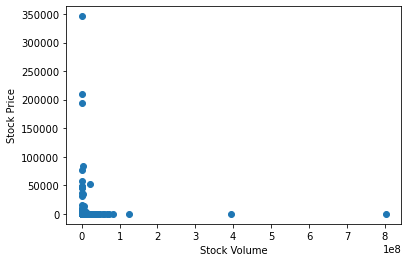

In [39]:
plt.scatter(results.Volume,results.Close)
plt.xlabel('Stock Volume')
plt.ylabel('Stock Price')
plt.show()
#based on graph below, we do not think there will be any accuracy to this linear regression model

In [40]:
#Setting up independent and dependent variables

X = results['Volume']
X = pd.get_dummies(X)


y = results['Close']

In [41]:
# Setting up the model training and testing group
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)


In [42]:
# Normalizing the variables
# scaler = MinMaxScaler()
# cols_to_norm = ['Volume']
# X_train[cols_to_norm] = scaler.fit_transform(X_train[cols_to_norm])
# X_test[cols_to_norm] = scaler.transform(X_test[cols_to_norm])


In [43]:
reg = linear_model.LinearRegression()
reg.fit(results[['Volume']],results.Close)


LinearRegression()

In [44]:
results.dtypes


index       int64
Volume    float64
Close     float64
dtype: object

In [45]:
reg.coef_

array([-4.95882154e-06])

In [46]:
reg.intercept_

1989.5580740162613

In [47]:
reg.predict([[1000000]])

C:\Users\Ben\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1984.59925248])

In [48]:
# Calculating the accuracy rate of the model
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.9999979131983378
-5.073199187669978e+22


C:\Users\Ben\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\Ben\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\Ben\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,


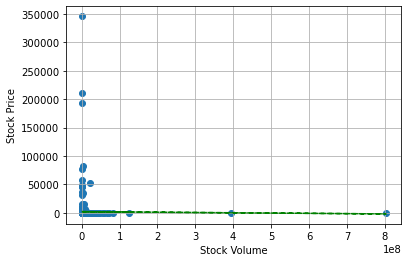

In [51]:
#New Scatter plot below
plt.scatter(results.Volume,results.Close)
plt.xlabel('Stock Volume')
plt.ylabel('Stock Price')
plt.grid(True)
z = np.polyfit(results.Volume, results.Close, 1)
p = np.poly1d(z)
plt.plot(results.Volume, p(results.Volume), "g--")
plt.show()

In [50]:
#TO DO
#start organizing data, see if currency is different, check what is the earliest and latest stocks, count rows of each tickers, more analysis, etc!
#make a model to generate assessments
#begin to answer questions about the stocks: what is highest selling and lowest selling stock, what country has the highest avg stock price, how many stocks by countries, avg stock volume by countries, 